 <div class="alert alert-block alert-success">
Lillian Jiang - Project 1
    
<div class="alert alert-block alert-warning">
    
 # grade 18.5/20-- Lillian, you got in trouble on errors by forgetting that subtracting the background requires an error propagation. see comments below. if you subtract the background per pixel from the image than that would require yet another error propagation, which is why I suggested you use the total background counts in the aperture to subtract the from the stellar counts. Also you did not say anything about the PSF of star A and B - its not enough to just show the picture

In [1]:
import numpy as np                       #numpy enables functions for data arrays
import matplotlib.pyplot as plt          #matplotlib enables plotting routines

The maximum intensity value is  1742.0


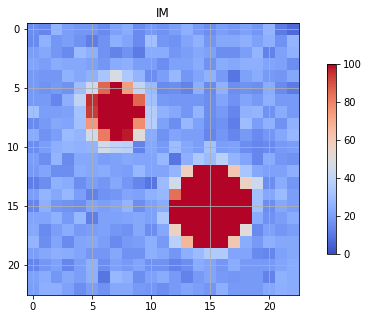

In [2]:
# load four images
im1 = np.loadtxt('im1.txt') 
im2 = np.loadtxt('im2.txt')
im3 = np.loadtxt('im3.txt') 
im4 = np.loadtxt('im4.txt')    

im = im1+im2+im3+im4
#IMSHOW
plt.figure(figsize=(10,5))
plt.imshow(im,cmap='coolwarm', vmin=0, vmax=100)
plt.grid()
plt.colorbar(shrink=0.7)
plt.title('IM')

#Find the maximum intensity value
max = np.max(im)
print("The maximum intensity value is ",max)

<div class="alert alert-block alert-warning">
    
 # there is too much happening in the following code cell, and the printed output is not easy to follow - why are formats for A counts different than B counts? you are extracting apertures, calculating average background and removing it from the stellar apertures. this level of detail needs to be spelled out more clearly, either with a longer markdown cell or separating into multiple code cells
 
 # you have not said why you want the average of the background, nor did you print its units of counts per pixel. please give reasons for your calculations in markdown cells

In [3]:
#create 'aperture' with center, radius for background, starA , starB

#Calculate the average of background
xc_b = 17
yc_b = 5
rad_b = 4
center_b = np.array([xc_b, yc_b])          # x,y position of aperture center in original image
xmin_b = xc_b-rad_b; xmax_b = xc_b+rad_b+1       # min,max x values to define aperture subarray
ymin_b = yc_b-rad_b; ymax_b = yc_b+rad_b+1       # min,max y values to define aperture subarray
aperture_b = im[xmin_b:xmax_b, ymin_b:ymax_b]  # extract subarray 'aperture' from original image
dim_ap_b = np.shape(aperture_b)          # dimensions of aperture subarray

average_b = int(np.mean(aperture_b))
print("The average background =",average_b)

# remove background 
im_b = im-average_b

#Aperture for StarA
xc_starA = 15
yc_starA = 15
rad_starA = 4
center_starA = np.array([xc_starA, yc_starA])          # x,y position of aperture center in original image
xmin_starA = xc_starA-rad_starA; xmax_starA = xc_starA+rad_starA+1       # min,max x values to define aperture subarray
ymin_starA = yc_starA-rad_starA; ymax_starA = yc_starA+rad_starA+1       # min,max y values to define aperture subarray
aperture_starA = im_b[xmin_starA:xmax_starA, ymin_starA:ymax_starA]  # extract subarray 'aperture' from original image
dim_ap_starA = np.shape(aperture_starA)          # dimensions of aperture subarray

print ("Aperture Radius_starA = " + str(rad_starA))
print ("Aperture Dimension_starA =" + str(dim_ap_starA) )
print(aperture_starA)

#Aperture for StarB
xc_starB = 7
yc_starB = 7
rad_starB = 4
center_starB = np.array([xc_starB, yc_starB])          # x,y position of aperture center in original image
xmin_starB = xc_starB-rad_starB; xmax_starB = xc_starB+rad_starB+1       # min,max x values to define aperture subarray
ymin_starB = yc_starB-rad_starB; ymax_starB = yc_starB+rad_starB+1       # min,max y values to define aperture subarray
aperture_starB = im_b[xmin_starB:xmax_starB, ymin_starB:ymax_starB]  # extract subarray 'aperture' from original image
dim_ap_starB = np.shape(aperture_starB)          # dimensions of aperture subarray

print ("Aperture Radius_starB = " + str(rad_starB))
print ("Aperture Dimension_starB =" + str(dim_ap_starB) )
print(aperture_starB)



The average background = 20
Aperture Radius_starA = 4
Aperture Dimension_starA =(9, 9)
[[ 8.000e+00 -1.000e+01  5.000e+00  1.400e+01  9.000e+00  1.800e+01
   7.000e+00  2.000e+00 -6.000e+00]
 [ 2.000e+00  7.000e+00  3.800e+01  1.070e+02  1.080e+02  1.210e+02
   4.100e+01  1.300e+01  3.000e+00]
 [ 9.000e+00  2.600e+01  1.890e+02  4.010e+02  5.660e+02  3.850e+02
   1.780e+02  3.700e+01  2.400e+01]
 [ 8.000e+00  6.400e+01  3.810e+02  9.340e+02  1.323e+03  9.770e+02
   3.910e+02  9.900e+01  1.100e+01]
 [ 4.000e+00  1.200e+02  5.540e+02  1.294e+03  1.722e+03  1.329e+03
   5.250e+02  1.220e+02  1.100e+01]
 [ 1.400e+01  8.100e+01  4.220e+02  9.570e+02  1.284e+03  9.780e+02
   4.130e+02  8.800e+01  4.000e+00]
 [ 3.000e+00  3.700e+01  1.660e+02  4.050e+02  5.490e+02  3.980e+02
   2.010e+02  3.100e+01 -5.000e+00]
 [-1.000e+00  1.800e+01  4.700e+01  9.100e+01  1.250e+02  1.190e+02
   4.100e+01  4.000e+00 -1.000e+00]
 [ 3.000e+00 -2.000e+00  5.000e+00  9.000e+00  1.500e+01  1.500e+01
   2.000e+00 

<div class="alert alert-block alert-warning">
    
  # state that these star subimages have background subtracted. 

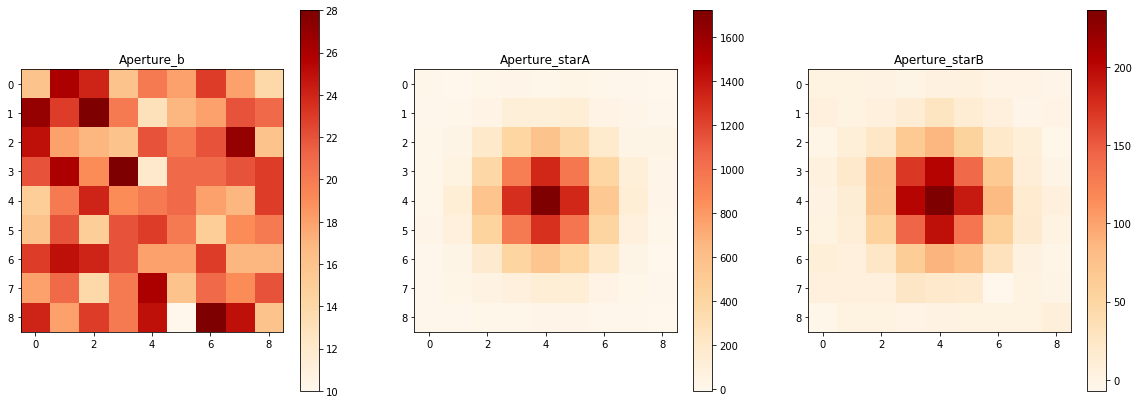

In [4]:
#display subimage 'aperture' with center, radius for background, starA , starB
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(aperture_b,cmap='OrRd')
plt.title('Aperture_b')
plt.colorbar(shrink=0.7)

plt.subplot(1,3,2)
plt.imshow(aperture_starA,cmap='OrRd')
plt.title('Aperture_starA')
plt.colorbar(shrink=0.7)

plt.subplot(1,3,3)
plt.imshow(aperture_starB,cmap='OrRd')
plt.title('Aperture_starB')
plt.colorbar(shrink=0.7)

<div class="alert alert-block alert-warning">
    
  # why make a second set of stellar apertures? use the ones you already have!

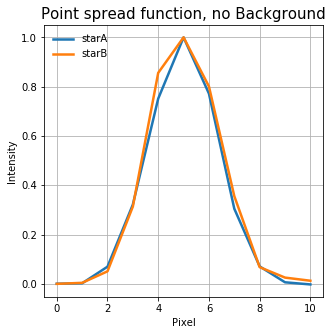

In [5]:
#create two 11x11 SUBIMAGES for stars centered at (15,15) and (7,7)
starA_b= im_b[10:21,10:21]   #A 11x11 array, A now centered at (5,5)
starB_b= im_b[2:13,2:13]     #B 11x11 array, B now centered at (5,5)


# EXTRACT central row from each 11x11subarray (row 5 centered is on each star) 
rowA = starA_b[5,:]       #  row across peak of Star A
rowB = starB_b[5,:]       #  row across peak of Star B

rowA_MAX = np.max(rowA)
rowB_MAX = np.max(rowB)

plt.figure(figsize=(5,5))
plt.plot(rowA/rowA_MAX, linestyle='-', linewidth=2.5, label = 'starA')
plt.plot(rowB/rowB_MAX, linestyle='-', linewidth=2.5, label = 'starB')
plt.xlabel("Pixel"), plt.ylabel("Intensity")
plt.title("Point spread function, no Background", size=15)
plt.legend(loc="upper left", frameon=False)
plt.grid()

<div class="alert alert-block alert-warning">
    
   # you need a conclusion from the psf plot - that is the whole point of this project...

In [6]:
#From the coutns for star A and B, find their ratio A/B
starA_total=np.sum(aperture_starA)
starB_total=np.sum(aperture_starB)
ratio = starA_total/starB_total
print("The A/B ratio is ", ratio)

The A/B ratio is  6.505571030640668


<div class="alert alert-block alert-warning">
    
 # you lost track of what you are doing. use poisson errors only for directly measured counts - that will be sums in apertures BEFORE background subtraction. Subtracting the background involves error propagation, 
 
 $S_* = S_{tot}-S_{back}$
 
 # by subtracting the average background from the images you have made this more complicated, which is why i suggested summing the backgrounds in the same apertures as the stars and subtracting summed counts. your errors are thus incorrect. 
 
 # Also, in the future please use markdown cells formatted in math mode to present any equations you are using -it is hard to follow the equations in the code cells without some guidance.

In [7]:
#In Astronomy, the signals from stars are in counting distrubution. Therefore, the standard error is the square root
# of the total signals.
starA_error = np.sqrt(starA_total)
starB_error = np.sqrt(starB_total)

# ratio=starA_total/starB_total 
# We use error propagation to calculate the error.
ratio_error = abs(ratio)*np.sqrt((starA_error/starA_total)**2+(starB_error/starB_total)**2)
print("The error of ratio A/B is ", ratio_error)
pe_error = ratio_error/ratio
print("The percent error is ", pe_error)

The error of ratio A/B is  0.13038942297757936
The percent error is  0.02004273296893641


<div class="alert alert-block alert-success">
    
   - The intensity ratio of star A/B is 6.5
    
   - The error of the ratio is 0.13
    
   - The percent error in this ratio is 2%
   
   <div class="alert alert-block alert-warning">
    
    ## this can also be presesente in math mode:
    The intensity ratio of star A/B is 6.5 $\pm$ 0.13 or $\pm$ 2%